<a href="https://colab.research.google.com/github/nitinrawat111/book-recommendation-system/blob/main/book_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown
import gzip
import pandas as pd
import numpy as np

Downloading datasets

In [2]:
def download_files(file_ids):
  for id in file_ids:
    url = 'https://drive.google.com/uc?id=' + id + '&confirm=T'
    gdown.download(url)

In [3]:
file_ids = ['1LXpK1UfqtP89H1tYy0pBGHjYk8IhigUK', '1zmylV7XW2dfQVCLeg1LbllfQtHD2KUon', '1CHTAaNwyzvbi1TR08MJrJ03BxA266Yxr']
download_files(file_ids)

Downloading...
From: https://drive.google.com/uc?id=1LXpK1UfqtP89H1tYy0pBGHjYk8IhigUK&confirm=T
To: /content/goodreads_books.json.gz
100%|██████████| 2.08G/2.08G [00:24<00:00, 84.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zmylV7XW2dfQVCLeg1LbllfQtHD2KUon&confirm=T
To: /content/goodreads_interactions.csv
100%|██████████| 4.32G/4.32G [00:36<00:00, 118MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1CHTAaNwyzvbi1TR08MJrJ03BxA266Yxr&confirm=T
To: /content/book_id_map.csv
100%|██████████| 37.8M/37.8M [00:01<00:00, 32.6MB/s]


In [4]:
!wc -l goodreads_books.json.gz
!wc -l goodreads_interactions.csv

7588375 goodreads_books.json.gz
228648343 goodreads_interactions.csv


Reading and Filtering Book Data

In [5]:
import json

In [6]:
with gzip.open("goodreads_books.json.gz") as file:
  line = file.readline()
  book =json.loads(line)
  print(json.dumps(book, indent=2))

{
  "isbn": "0312853122",
  "text_reviews_count": "1",
  "series": [],
  "country_code": "US",
  "language_code": "",
  "popular_shelves": [
    {
      "count": "3",
      "name": "to-read"
    },
    {
      "count": "1",
      "name": "p"
    },
    {
      "count": "1",
      "name": "collection"
    },
    {
      "count": "1",
      "name": "w-c-fields"
    },
    {
      "count": "1",
      "name": "biography"
    }
  ],
  "asin": "",
  "is_ebook": "false",
  "average_rating": "4.00",
  "kindle_asin": "",
  "similar_books": [],
  "description": "",
  "format": "Paperback",
  "link": "https://www.goodreads.com/book/show/5333265-w-c-fields",
  "authors": [
    {
      "author_id": "604031",
      "role": ""
    }
  ],
  "publisher": "St. Martin's Press",
  "num_pages": "256",
  "publication_day": "1",
  "isbn13": "9780312853129",
  "publication_month": "9",
  "edition_information": "",
  "publication_year": "1984",
  "url": "https://www.goodreads.com/book/show/5333265-w-c-fields",

In [7]:
def parse_book_from_line(line):
  book = json.loads(line)
  return {
      'average_rating': book['average_rating'],                                                                                
      'num_pages': book['num_pages'],                                                                                      
      'image_url': book['image_url'],                               
      'book_id': book['book_id'],                                                                                    
      'ratings_count': book['ratings_count'],
      'title': book['title_without_series']
  }

books = []
with gzip.open("goodreads_books.json.gz") as file:

  #Skipping column header line
  line = file.readline()

  while True:
    line = file.readline()
    if not line:
      break

    curr_book = parse_book_from_line(line)

    try:
      curr_book['ratings_count'] = int(curr_book['ratings_count'])
      if curr_book['ratings_count'] > 20:
        books.append(curr_book)
    except:
      pass
print(len(books))    

1171891


In [8]:
books_df = pd.DataFrame.from_dict(books)

In [9]:
books_df

,average_rating,num_pages,image_url,book_id,ratings_count,title
0,4.03,600,https://images.gr-assets.com/books/1304100136m...,7327624,140,"The Unschooled Wizard (Sun Wolf and Starhawk, ..."
1,3.49,368,https://s.gr-assets.com/assets/nophoto/book/11...,6066819,51184,Best Friends Forever
2,4.13,162,https://s.gr-assets.com/assets/nophoto/book/11...,287141,46,The Aeneid for Boys and Girls
3,4.22,216,https://images.gr-assets.com/books/1316637798m...,6066812,98,All's Fairy in Love and War (Avalon: Web of Ma...
4,3.81,147,https://images.gr-assets.com/books/1328768789m...,287149,986,The Devil's Notebook
...,...,...,...,...,...,...
1171886,3.51,192,https://s.gr-assets.com/assets/nophoto/book/11...,1370179,240,The Brazilian Boss's Innocent Mistress
1171887,4.02,84,https://images.gr-assets.com/books/1379766592m...,17805813,327,"Ondine (Ondine Quartet, #0.5)"
1171888,3.42,192,https://s.gr-assets.com/assets/nophoto/book/11...,2685097,112,The Spaniard's Blackmailed Bride
1171889,4.00,96,https://s.gr-assets.com/assets/nophoto/book/11...,2342551,36,The Children's Classic Poetry Collection


In [10]:
books_df.dtypes

average_rating    object
num_pages         object
image_url         object
book_id           object
ratings_count      int64
title             object
dtype: object

In [11]:
books_df['average_rating'] = pd.to_numeric(books_df['average_rating'])
books_df['num_pages'] = pd.to_numeric(books_df['num_pages'])
books_df['book_id'] = pd.to_numeric(books_df['book_id'])

In [12]:
books_df.dtypes

average_rating    float64
num_pages         float64
image_url          object
book_id             int64
ratings_count       int64
title              object
dtype: object

In [13]:
books_df['standardized_title'] = books_df['title'].str.replace("[^a-zA-Z0-9 ]", "", regex=True)
books_df['standardized_title'] = books_df['standardized_title'].str.lower()

In [14]:
books_df

,average_rating,num_pages,image_url,book_id,ratings_count,title,standardized_title
0,4.03,600.0,https://images.gr-assets.com/books/1304100136m...,7327624,140,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",the unschooled wizard sun wolf and starhawk 12
1,3.49,368.0,https://s.gr-assets.com/assets/nophoto/book/11...,6066819,51184,Best Friends Forever,best friends forever
2,4.13,162.0,https://s.gr-assets.com/assets/nophoto/book/11...,287141,46,The Aeneid for Boys and Girls,the aeneid for boys and girls
3,4.22,216.0,https://images.gr-assets.com/books/1316637798m...,6066812,98,All's Fairy in Love and War (Avalon: Web of Ma...,alls fairy in love and war avalon web of magic 8
4,3.81,147.0,https://images.gr-assets.com/books/1328768789m...,287149,986,The Devil's Notebook,the devils notebook
...,...,...,...,...,...,...,...
1171886,3.51,192.0,https://s.gr-assets.com/assets/nophoto/book/11...,1370179,240,The Brazilian Boss's Innocent Mistress,the brazilian bosss innocent mistress
1171887,4.02,84.0,https://images.gr-assets.com/books/1379766592m...,17805813,327,"Ondine (Ondine Quartet, #0.5)",ondine ondine quartet 05
1171888,3.42,192.0,https://s.gr-assets.com/assets/nophoto/book/11...,2685097,112,The Spaniard's Blackmailed Bride,the spaniards blackmailed bride
1171889,4.00,96.0,https://s.gr-assets.com/assets/nophoto/book/11...,2342551,36,The Children's Classic Poetry Collection,the childrens classic poetry collection


Observing Books Ratings Data **graphically**

In [15]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171891 entries, 0 to 1171890
Data columns (total 7 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   average_rating      1171891 non-null  float64
 1   num_pages           844007 non-null   float64
 2   image_url           1171891 non-null  object 
 3   book_id             1171891 non-null  int64  
 4   ratings_count       1171891 non-null  int64  
 5   title               1171891 non-null  object 
 6   standardized_title  1171891 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 62.6+ MB


In [16]:
books_df.describe()

,average_rating,num_pages,book_id,ratings_count
count,1.171891e+06,844007.000000,1.171891e+06,1.171891e+06
mean,3.888222e+00,282.386061,1.327815e+07,8.109579e+02
std,3.537380e-01,1050.399038,1.068249e+07,1.577952e+04
min,0.000000e+00,0.000000,1.000000e+00,2.100000e+01
25%,3.680000e+00,175.000000,2.044616e+06,3.800000e+01
50%,3.910000e+00,266.000000,1.239389e+07,7.700000e+01
75%,4.130000e+00,360.000000,2.229273e+07,2.190000e+02
max,5.000000e+00,945077.000000,3.651543e+07,4.899965e+06


<ipython-input-19-56b9f0cd87e6>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(ratings_count_series.index, ratings_count_series)


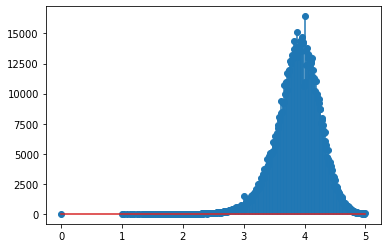

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ratings_count_series = books_df['average_rating'].value_counts();
ax.stem(ratings_count_series.index, ratings_count_series)

plt.show()

My reviewed Book Tiltles and their corresponding ratings

In [20]:
my_books_dict = { 
                        'titles': ["A Court of Mist and Fury", "It Ends with us", "A little life", "The girl on the train", "All the bright places", "The blood of Olympus", "Fault in our stars", "A thousand boy kisses", "Ruby Red", "The Deal", "Blood red road", "Seven Husbands of evelyn hugo", "Song of Achilles", "Shatter Me", "The Summer i turned pretty", "After", "My Policeman", "Kite Runner", "Thousand Splendid Suns", "And the mountains echoed"],
                        'ratings': [5, 5, 4.5, 5, 4, 4.5, 4, 3.5, 3.75, 4, 2.5, 4.5, 4.75, 3.75, 4.5, 1.5, 4, 3, 3.5, 4] 
                }
my_books_df = pd.DataFrame(data=my_books_dict)          

In [21]:
my_books_df

,titles,ratings
0,A Court of Mist and Fury,5.00
1,It Ends with us,5.00
2,A little life,4.50
3,The girl on the train,5.00
4,All the bright places,4.00
5,The blood of Olympus,4.50
6,Fault in our stars,4.00
7,A thousand boy kisses,3.50
8,Ruby Red,3.75
9,The Deal,4.00


In [22]:
my_books_df.columns = ['title', 'rating']

In [23]:
my_books_df

,title,rating
0,A Court of Mist and Fury,5.00
1,It Ends with us,5.00
2,A little life,4.50
3,The girl on the train,5.00
4,All the bright places,4.00
5,The blood of Olympus,4.50
6,Fault in our stars,4.00
7,A thousand boy kisses,3.50
8,Ruby Red,3.75
9,The Deal,4.00


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Creating vectorizer to search books using titles
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(books_df['standardized_title'])

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
import re

#Function to search book titles in the books dataframe and return corresponding row indices
def search_books(book_titles, vectorizer):
  book_titles_standardized = []
  for title in book_titles:
    book_titles_standardized.append(re.sub("[^a-zA-Z0-9 ]", "", title.lower()))

  book_indices = []
  for title in book_titles_standardized:
    query_tfidf_vector = vectorizer.transform([title])
    
    similarity_vector = cosine_similarity(query_tfidf_vector, tfidf_matrix).flatten()
    max_similarity_indices = np.argpartition(similarity_vector, -10)[-10:]
    
    query_results_df = books_df.iloc[max_similarity_indices]
    book_indices.append(query_results_df['ratings_count'].idxmax())
  return book_indices

In [26]:
#Creating a column of book indices in my_books_df
my_books_indices = search_books(my_books_dict['titles'], vectorizer)
my_books_df['book_id'] = pd.Series(books_df.iloc[my_books_indices]['book_id'].values)

In [27]:
my_books_df

,title,rating,book_id
0,A Court of Mist and Fury,5.00,17927395
1,It Ends with us,5.00,27362503
2,A little life,4.50,23751692
3,The girl on the train,5.00,23364977
4,All the bright places,4.00,18460392
5,The blood of Olympus,4.50,18705209
6,Fault in our stars,4.00,17118893
7,A thousand boy kisses,3.50,25912358
8,Ruby Red,3.75,11531817
9,The Deal,4.00,35607746


In [28]:
my_books_indices

[951665,
 547183,
 361660,
 928896,
 1071217,
 306568,
 653663,
 159466,
 1067618,
 601534,
 367045,
 231229,
 389644,
 1069469,
 194899,
 420580,
 598164,
 572729,
 444563,
 749074]

In [29]:
def show_image_formatter(url):
  return '<img src={}></img>'.format(url)

books_df.iloc[my_books_indices].style.format({'image_url': show_image_formatter})

,average_rating,num_pages,image_url,book_id,ratings_count,title,standardized_title
951665,4.710000,626.000000,,17927395,120403,"A Court of Mist and Fury (A Court of Thorns and Roses, #2)",a court of mist and fury a court of thorns and roses 2
547183,4.430000,nan,,27362503,88278,It Ends with Us,it ends with us
361660,4.280000,736.000000,,23751692,7373,A Little Life,a little life
928896,3.880000,336.000000,,23364977,39310,The Girl on the Train,the girl on the train
1071217,4.190000,378.000000,,18460392,142495,All the Bright Places,all the bright places
306568,4.420000,516.000000,,18705209,115576,"The Blood of Olympus (The Heroes of Olympus, #5)",the blood of olympus the heroes of olympus 5
653663,4.260000,318.000000,,17118893,11668,The Fault in Our Stars,the fault in our stars
159466,4.280000,316.000000,,25912358,11023,A Thousand Boy Kisses,a thousand boy kisses
1067618,4.120000,337.000000,,11531817,809,"Ruby Red (Ruby Red, #1)",ruby red ruby red 1
601534,4.060000,nan,,35607746,212,The Deal,the deal


Creating a Book id mapping to Map csv_book_id in interactions file to actual_book_id

In [30]:
book_id_mapping = {}
with open("book_id_map.csv") as file:

  #Skipping column header line
  file.readline()

  while True:
    line = file.readline()
    
    if not line:
      break
    
    csv_id, book_id = line.split(',')
    csv_id = int(csv_id)
    book_id = int(book_id)
    book_id_mapping[csv_id] = book_id

Model 1: Simple Popularity based recommendation

In [31]:
def get_popular_books(books_df, count = 20):
  books_df['score'] = books_df['average_rating'] * books_df['ratings_count']
  books_df.sort_values('score', ascending=False, inplace=True)
  return books_df.head(count)

popular_books = get_popular_books(books_df, 20)
popular_books

,average_rating,num_pages,image_url,book_id,ratings_count,title,standardized_title,score
255053,4.34,374.0,https://images.gr-assets.com/books/1447303603m...,2767052,4899965,"The Hunger Games (The Hunger Games, #1)",the hunger games the hunger games 1,21265848.10
786647,4.45,320.0,https://images.gr-assets.com/books/1474154022m...,3,4765497,Harry Potter and the Sorcerer's Stone (Harry P...,harry potter and the sorcerers stone harry pot...,21206461.65
289541,3.57,498.0,https://images.gr-assets.com/books/1361039443m...,41865,3941381,"Twilight (Twilight, #1)",twilight twilight 1,14070730.17
708106,4.26,324.0,https://images.gr-assets.com/books/1361975680m...,2657,3255518,To Kill a Mockingbird,to kill a mockingbird,13868506.68
415023,3.89,180.0,https://images.gr-assets.com/books/1490528560m...,4671,2758812,The Great Gatsby,the great gatsby,10731778.68
980650,4.26,313.0,https://images.gr-assets.com/books/1360206420m...,11870085,2429317,The Fault in Our Stars,the fault in our stars,10348890.42
400256,4.25,366.0,https://images.gr-assets.com/books/1372847500m...,5907,2099680,The Hobbit,the hobbit,8923640.00
126098,4.25,279.0,https://images.gr-assets.com/books/1320399351m...,1885,2078406,Pride and Prejudice,pride and prejudice,8833225.50
510063,4.53,435.0,https://images.gr-assets.com/books/1499277281m...,5,1876252,Harry Potter and the Prisoner of Azkaban (Harr...,harry potter and the prisoner of azkaban harry...,8499421.56
550784,4.14,328.0,https://images.gr-assets.com/books/1348990566m...,5470,2023937,1984,1984,8379099.18


In [32]:
popular_books['title']

255053               The Hunger Games (The Hunger Games, #1)
786647     Harry Potter and the Sorcerer's Stone (Harry P...
289541                               Twilight (Twilight, #1)
708106                                 To Kill a Mockingbird
415023                                      The Great Gatsby
980650                                The Fault in Our Stars
400256                                            The Hobbit
126098                                   Pride and Prejudice
510063     Harry Potter and the Prisoner of Azkaban (Harr...
550784                                                  1984
1126524                            The Diary of a Young Girl
1137713                            Divergent (Divergent, #1)
808272     Harry Potter and the Deathly Hallows (Harry Po...
1117863    Harry Potter and the Goblet of Fire (Harry Pot...
891116     Harry Potter and the Chamber of Secrets (Harry...
746012                  Catching Fire (The Hunger Games, #2)
359488                  

MODEL 2: Finding users who liked same books as us and recommending their other liked books

In [33]:
#Creating a set of ids of books that we rated >= 4
#Set allows checking if it contains a value or not in O(1)
my_liked_books_set = set(my_books_df[my_books_df['rating'] >= 4]['book_id'])

In [34]:
my_liked_books_set

{5821978,
 11250317,
 15773662,
 17118893,
 17609271,
 17927395,
 18460392,
 18705209,
 23364977,
 23751692,
 27362503,
 32620332,
 35607746}

In [35]:
similar_users = set()
with open("goodreads_interactions.csv") as file:

  #Skipping column header line
  line = file.readline()

  while True:
    line = file.readline()
    
    if not line:
      break

    user_id, csv_book_id, is_read, rating, is_reviewed = line.split(',')
    user_id = int(user_id)
    if user_id in similar_users:
      continue

    try:
      rating = int(rating)
      if rating >= 4:
        csv_book_id = int(csv_book_id)
        book_id = book_id_mapping[csv_book_id]
        if book_id in my_liked_books_set:
          similar_users.add(user_id)
    except:
      pass
print(similar_users)

{262144, 262149, 786440, 393226, 14, 393238, 262173, 262177, 524322, 393255, 41, 43, 393261, 262190, 393263, 131121, 655412, 131129, 262205, 393278, 63, 131135, 65, 66, 262208, 262211, 393287, 262216, 131151, 131153, 393299, 655443, 131158, 131159, 393302, 131161, 655451, 262236, 95, 131168, 262243, 262244, 786533, 262248, 393321, 393322, 131179, 131183, 393331, 131189, 262262, 393339, 262271, 393345, 262274, 262277, 393355, 655499, 142, 393358, 655504, 131219, 149, 262293, 655513, 131229, 262301, 393375, 131234, 262307, 393380, 524450, 172, 262319, 786608, 131250, 131251, 131253, 262326, 185, 262329, 262333, 262335, 393407, 131266, 195, 197, 262341, 131275, 205, 393422, 209, 655571, 214, 225, 393442, 786675, 393461, 131318, 250, 262395, 262396, 253, 254, 262398, 393471, 655616, 258, 786683, 260, 262405, 131335, 264, 131337, 393482, 524553, 393484, 269, 262413, 271, 655631, 262418, 280, 281, 655640, 131357, 655645, 131359, 262435, 292, 393507, 393511, 262440, 393512, 786730, 308, 13138

In [36]:
recommended_book_ids = []
with open("goodreads_interactions.csv") as file:

  #Skipping column header line
  line = file.readline()

  while True:
    line = file.readline()
    
    if not line:
      break

    user_id, csv_book_id, is_read, rating, is_reviewed = line.split(',')
    user_id = int(user_id)
    if user_id in similar_users:
      try:
        rating = int(rating)
        if rating >= 4:
          csv_book_id = int(csv_book_id)
          book_id = book_id_mapping[csv_book_id]
          if book_id not in my_liked_books_set:
            recommended_book_ids.append(book_id)
      except:
        pass

In [37]:
print(recommended_book_ids[:10])

[12881778, 10818853, 11857408, 18806659, 13448656, 12979313, 11505797, 12513614, 5055725, 8204005]


In [38]:
recommended_book_ids_df = pd.DataFrame(data=recommended_book_ids, columns=['book_id'])
recommended_book_ids_df = recommended_book_ids_df['book_id'].value_counts()
recommended_book_ids_df = recommended_book_ids_df.to_frame().reset_index()
recommended_book_ids_df.columns = ['book_id', 'similar_users_count']
recommended_book_ids_df

,book_id,similar_users_count
0,2767052,35425
1,3,31632
2,11870085,28333
3,6148028,25513
4,5,23869
...,...,...
775351,10420417,1
775352,29429894,1
775353,17155469,1
775354,16146300,1


In [39]:
top_recommended_book_ids = recommended_book_ids_df.head(20)['book_id'].values
print(top_recommended_book_ids)

[ 2767052        3 11870085  6148028        5    15881        6   136251
 13335037        1        2  7260188    28187   256683 16096824 11735983
    41865     2657  3777732 15745753]


In [40]:
books_df[books_df['book_id'].isin(top_recommended_book_ids)].style.format({'image_url': show_image_formatter})

,average_rating,num_pages,image_url,book_id,ratings_count,title,standardized_title,score
255053,4.340000,374.000000,,2767052,4899965,"The Hunger Games (The Hunger Games, #1)",the hunger games the hunger games 1,21265848.100000
786647,4.450000,320.000000,,3,4765497,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",harry potter and the sorcerers stone harry potter 1,21206461.650000
289541,3.570000,498.000000,,41865,3941381,"Twilight (Twilight, #1)",twilight twilight 1,14070730.170000
708106,4.260000,324.000000,,2657,3255518,To Kill a Mockingbird,to kill a mockingbird,13868506.680000
980650,4.260000,313.000000,,11870085,2429317,The Fault in Our Stars,the fault in our stars,10348890.420000
510063,4.530000,435.000000,,5,1876252,"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",harry potter and the prisoner of azkaban harry potter 3,8499421.560000
1137713,4.230000,487.000000,,13335037,1962813,"Divergent (Divergent, #1)",divergent divergent 1,8302698.990000
808272,4.620000,759.000000,,136251,1784684,"Harry Potter and the Deathly Hallows (Harry Potter, #7)",harry potter and the deathly hallows harry potter 7,8245240.080000
1117863,4.530000,734.000000,,6,1792561,"Harry Potter and the Goblet of Fire (Harry Potter, #4)",harry potter and the goblet of fire harry potter 4,8120301.330000
891116,4.380000,341.000000,,15881,1821802,"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",harry potter and the chamber of secrets harry potter 2,7979492.760000


In [41]:
recommended_books_df = books_df.merge(recommended_book_ids_df, how='inner', on='book_id')
recommended_books_df

,average_rating,num_pages,image_url,book_id,ratings_count,title,standardized_title,score,similar_users_count
0,4.34,374.0,https://images.gr-assets.com/books/1447303603m...,2767052,4899965,"The Hunger Games (The Hunger Games, #1)",the hunger games the hunger games 1,21265848.10,35425
1,4.45,320.0,https://images.gr-assets.com/books/1474154022m...,3,4765497,Harry Potter and the Sorcerer's Stone (Harry P...,harry potter and the sorcerers stone harry pot...,21206461.65,31632
2,3.57,498.0,https://images.gr-assets.com/books/1361039443m...,41865,3941381,"Twilight (Twilight, #1)",twilight twilight 1,14070730.17,16248
3,4.26,324.0,https://images.gr-assets.com/books/1361975680m...,2657,3255518,To Kill a Mockingbird,to kill a mockingbird,13868506.68,15787
4,3.89,180.0,https://images.gr-assets.com/books/1490528560m...,4671,2758812,The Great Gatsby,the great gatsby,10731778.68,11487
...,...,...,...,...,...,...,...,...,...
648840,2.09,40.0,https://s.gr-assets.com/assets/nophoto/book/11...,15705327,24,The Crib,the crib,50.16,1
648841,2.05,NaN,https://images.gr-assets.com/books/1351203059m...,16109440,21,الناسخ والمنسوخ في القرآن الكريم,,43.05,1
648842,2.00,NaN,https://s.gr-assets.com/assets/nophoto/book/11...,20991545,21,Possessed (31 Horrifying Tales From The Dead B...,possessed 31 horrifying tales from the dead bo...,42.00,1
648843,1.95,422.0,https://images.gr-assets.com/books/1412084257m...,23211682,21,The Boy A Thousand Years Wide,the boy a thousand years wide,40.95,1


In [42]:
recommended_books_df['score'] = recommended_books_df['similar_users_count'] * (recommended_books_df['similar_users_count'] / recommended_books_df['ratings_count'])
recommended_books_df.sort_values('score', ascending=False, inplace=True)

In [43]:
recommended_books_df.head(20).style.format({'image_url': show_image_formatter})

,average_rating,num_pages,image_url,book_id,ratings_count,title,standardized_title,score,similar_users_count
451,4.280000,416.000000,,16096824,182581,"A Court of Thorns and Roses (A Court of Thorns and Roses, #1)",a court of thorns and roses a court of thorns and roses 1,1674.655063,17486
1332,4.530000,699.000000,,23766634,67184,"A Court of Wings and Ruin (A Court of Thorns and Roses, #3)",a court of wings and ruin a court of thorns and roses 3,1422.513932,9776
464,4.490000,418.000000,,17167166,169307,"Crown of Midnight (Throne of Glass, #2)",crown of midnight throne of glass 2,1239.772390,14488
774,4.600000,648.000000,,18006496,106182,"Queen of Shadows (Throne of Glass, #4)",queen of shadows throne of glass 4,1226.299382,11411
619,4.530000,565.000000,,20613470,131440,"Heir of Fire (Throne of Glass, #3)",heir of fire throne of glass 3,1215.532562,12640
1234,4.580000,693.000000,,28260587,70571,"Empire of Storms (Throne of Glass, #5)",empire of storms throne of glass 5,1004.610959,8420
840,4.460000,462.000000,,23437156,102183,"Six of Crows (Six of Crows, #1)",six of crows six of crows 1,787.068534,8968
793,4.490000,827.000000,,13206900,106410,"Winter (The Lunar Chronicles, #4)",winter the lunar chronicles 4,733.717658,8836
465,4.460000,552.000000,,13206828,170191,"Cress (The Lunar Chronicles, #3)",cress the lunar chronicles 3,732.717294,11167
466,4.550000,597.000000,,12127810,166160,"The House of Hades (The Heroes of Olympus, #4)",the house of hades the heroes of olympus 4,719.633034,10935


In [44]:
recommended_books_df['title'].head(20)

451     A Court of Thorns and Roses (A Court of Thorns...
1332    A Court of Wings and Ruin (A Court of Thorns a...
464               Crown of Midnight (Throne of Glass, #2)
774                Queen of Shadows (Throne of Glass, #4)
619                    Heir of Fire (Throne of Glass, #3)
1234               Empire of Storms (Throne of Glass, #5)
840                       Six of Crows (Six of Crows, #1)
793                     Winter (The Lunar Chronicles, #4)
465                      Cress (The Lunar Chronicles, #3)
466        The House of Hades (The Heroes of Olympus, #4)
405                    Scarlet (The Lunar Chronicles, #2)
1602     The Assassin's Blade (Throne of Glass, #0.1-0.5)
260                 Throne of Glass (Throne of Glass, #1)
1581    The Wrath and the Dawn (The Wrath and the Dawn...
214                                               Fangirl
1674                                           November 9
1759                   Crooked Kingdom (Six of Crows, #2)
2010          

Model 3: Finding users similar to us in terms of rating. Matching out ratings vactor to rating vectors of other users and finding most similar users. Then recommending books that they rated high.

In [45]:
#Set which contains id of books we have reviewed
my_books_ids_set = set(my_books_df['book_id'])

In [46]:
my_books_ids_set

{101111,
 3850639,
 5821978,
 11250317,
 11472297,
 11531817,
 15773662,
 17118893,
 17609271,
 17621376,
 17927395,
 18460392,
 18705209,
 23364977,
 23655050,
 23751692,
 25912358,
 27362503,
 32620332,
 35607746}

In [47]:
#Dictionary which contains users similar to us (as keys) and how many books out of our reviewed books they have read (as values)
similar_users_dict = {}

with open("goodreads_interactions.csv") as file:

  #Skipping column header line
  line = file.readline()

  while True:
    line = file.readline()
    
    if not line:
      break

    user_id, csv_book_id, is_read, rating, is_reviewed = line.split(',')
    user_id = int(user_id)
    csv_book_id = int(csv_book_id)
    book_id = book_id_mapping[csv_book_id]
    if book_id in my_books_ids_set:
      if user_id in similar_users_dict:
        similar_users_dict[user_id] += 1
      else:
        similar_users_dict[user_id] = 1
print(len(similar_users_dict))

131763


In [48]:
filtered_similar_users_set = set([key for key in similar_users_dict if similar_users_dict[key] > (len(my_books_ids_set) * 0.20)])
print(len(filtered_similar_users_set))

1751


In [49]:
#Array in which each element represents a rating given by a similar user in the format [user_id, book_id, rating]
similar_users_book_ratings = []

with open("goodreads_interactions.csv") as file:

  #Skipping column header line
  line = file.readline()

  while True:
    line = file.readline()
    
    if not line:
      break

    user_id, csv_book_id, is_read, rating, is_reviewed = line.split(',')
    user_id = int(user_id)
    if user_id in filtered_similar_users_set:
      try:
        rating = int(rating)
        
        csv_book_id = int(csv_book_id)
        book_id = book_id_mapping[csv_book_id]
        
        similar_users_book_ratings.append([user_id, book_id, rating])
      except: 
        pass
print(len(similar_users_book_ratings))
print(similar_users_book_ratings[0])

4921484
[281, 6216670, 5]


In [50]:
similar_users_book_ratings = pd.DataFrame(similar_users_book_ratings, columns=['user_id', 'book_id', 'rating'])

In [51]:
similar_users_book_ratings

,user_id,book_id,rating
0,281,6216670,5
1,281,10647131,5
2,281,8508740,5
3,281,6297286,5
4,281,7116568,5
...,...,...,...
4921479,710550,15790842,0
4921480,710550,28512548,0
4921481,710550,237209,0
4921482,710550,27383717,0


In [52]:
#Modifying my_books_df so that we can merge it with this above dataframe
#Our user_id is -1
my_books_df['title'] = -1
my_books_df.columns = ['user_id', 'book_id', 'rating']
my_books_df

,user_id,book_id,rating
0,-1,5.00,17927395
1,-1,5.00,27362503
2,-1,4.50,23751692
3,-1,5.00,23364977
4,-1,4.00,18460392
5,-1,4.50,18705209
6,-1,4.00,17118893
7,-1,3.50,25912358
8,-1,3.75,11531817
9,-1,4.00,35607746


In [53]:
#Merging our book ratings with similar user book ratings
similar_users_book_ratings = pd.concat([my_books_df, similar_users_book_ratings])

In [54]:
similar_users_book_ratings

,user_id,book_id,rating
0,-1,5.0,17927395
1,-1,5.0,27362503
2,-1,4.5,23751692
3,-1,5.0,23364977
4,-1,4.0,18460392
...,...,...,...
4921479,710550,15790842.0,0
4921480,710550,28512548.0,0
4921481,710550,237209.0,0
4921482,710550,27383717.0,0


In [55]:
len(similar_users_book_ratings['user_id'].unique())

1752

In [56]:
len(similar_users_book_ratings['book_id'].unique())

665776

In [57]:
similar_users_book_ratings['user_index'] = similar_users_book_ratings['user_id'].astype("category").cat.codes

In [58]:
similar_users_book_ratings

,user_id,book_id,rating,user_index
0,-1,5.0,17927395,0
1,-1,5.0,27362503,0
2,-1,4.5,23751692,0
3,-1,5.0,23364977,0
4,-1,4.0,18460392,0
...,...,...,...,...
4921479,710550,15790842.0,0,1751
4921480,710550,28512548.0,0,1751
4921481,710550,237209.0,0,1751
4921482,710550,27383717.0,0,1751


In [59]:
similar_users_book_ratings['book_index'] = similar_users_book_ratings['book_id'].astype("category").cat.codes

In [60]:
similar_users_book_ratings

,user_id,book_id,rating,user_index,book_index
0,-1,5.0,17927395,0,10
1,-1,5.0,27362503,0,10
2,-1,4.5,23751692,0,8
3,-1,5.0,23364977,0,10
4,-1,4.0,18460392,0,7
...,...,...,...,...,...
4921479,710550,15790842.0,0,1751,334997
4921480,710550,28512548.0,0,1751,583386
4921481,710550,237209.0,0,1751,48434
4921482,710550,27383717.0,0,1751,569889


In [61]:
from scipy.sparse import coo_matrix

ratings_matrix_coo = coo_matrix( (similar_users_book_ratings['rating'], (similar_users_book_ratings['user_index'], similar_users_book_ratings['book_index']) ))

In [62]:
ratings_matrix_coo

<1752x665776 sparse matrix of type '<class 'numpy.int64'>'
	with 4921504 stored elements in COOrdinate format>

In [63]:
ratings_matrix_csr = ratings_matrix_coo.tocsr()

In [64]:
ratings_matrix_csr

<1752x665776 sparse matrix of type '<class 'numpy.int64'>'
	with 4921493 stored elements in Compressed Sparse Row format>

In [65]:
ratings_similarity = cosine_similarity(ratings_matrix_csr[0], ratings_matrix_csr).flatten()

In [66]:
ratings_similarity

array([1.00000000e+00, 2.52699594e-02, 3.21896985e-05, ...,
       3.88473700e-02, 1.37348826e-02, 0.00000000e+00])

In [67]:
most_similar_user_indices = np.argsort(ratings_similarity)[-20:]
most_similar_user_indices

array([ 571, 1128, 1389, 1303, 1473,  924, 1497,  883, 1363,  980, 1597,
        668,  600, 1625,  159, 1073, 1356, 1595, 1528,    0])

In [68]:
#contains review of users most similar to us
most_similar_users = similar_users_book_ratings[similar_users_book_ratings['user_index'].isin(most_similar_user_indices)]

#Removing ourselves from most similar users
most_similar_users = most_similar_users[most_similar_users['user_id'] != -1]

In [69]:
most_similar_users

,user_id,book_id,rating,user_index,book_index
515595,51911,11607446.0,5,159,280501
515596,51911,10592.0,0,159,3395
515597,51911,1162543.0,0,159,127515
515598,51911,13152.0,0,159,4371
515599,51911,13139.0,0,159,4361
...,...,...,...,...,...
4417678,389896,27193294.0,0,1625,566788
4417679,389896,15931.0,0,1625,5381
4417680,389896,3473.0,0,1625,1038
4417681,389896,33249079.0,0,1625,636689


In [70]:
recommended_books = most_similar_users[['book_id', 'rating']].groupby('book_id').agg(['count', 'mean'])

In [71]:
recommended_books

rating          
            count      mean
book_id                    
1.0            16  3.250000
2.0            19  3.263158
3.0            18  4.722222
4.0             1  5.000000
5.0            19  4.947368
...           ...       ...
36359009.0      1  0.000000
36373464.0      1  0.000000
36381037.0      1  0.000000
36383506.0      1  0.000000
36389267.0      1  0.000000

[22144 rows x 2 columns]

In [72]:
recommended_books = recommended_books.reset_index()
recommended_books

book_id rating          
                   count      mean
0             1.0     16  3.250000
1             2.0     19  3.263158
2             3.0     18  4.722222
3             4.0      1  5.000000
4             5.0     19  4.947368
...           ...    ...       ...
22139  36359009.0      1  0.000000
22140  36373464.0      1  0.000000
22141  36381037.0      1  0.000000
22142  36383506.0      1  0.000000
22143  36389267.0      1  0.000000

[22144 rows x 3 columns]

In [73]:
recommended_books.columns = ['book_id', 'similar_users_rating_count', 'mean_rating_among_similar_users']
recommended_books

,book_id,similar_users_rating_count,mean_rating_among_similar_users
0,1.0,16,3.250000
1,2.0,19,3.263158
2,3.0,18,4.722222
3,4.0,1,5.000000
4,5.0,19,4.947368
...,...,...,...
22139,36359009.0,1,0.000000
22140,36373464.0,1,0.000000
22141,36381037.0,1,0.000000
22142,36383506.0,1,0.000000


In [74]:
recommended_books = recommended_books[recommended_books['mean_rating_among_similar_users'] >= 4]
recommended_books = recommended_books[~recommended_books['book_id'].isin(my_books_ids_set)]
recommended_books

,book_id,similar_users_rating_count,mean_rating_among_similar_users
2,3.0,18,4.722222
3,4.0,1,5.000000
4,5.0,19,4.947368
5,6.0,18,4.166667
10,30.0,1,4.000000
...,...,...,...
21810,34227894.0,1,5.000000
21831,34342201.0,1,4.000000
21883,34536956.0,1,5.000000
22017,35120479.0,1,5.000000


In [75]:
recommended_books = recommended_books.merge(books_df, how='inner', on='book_id')
recommended_books

,book_id,similar_users_rating_count,mean_rating_among_similar_users,average_rating,num_pages,image_url,ratings_count,title,standardized_title,score
0,3.0,18,4.722222,4.45,320.0,https://images.gr-assets.com/books/1474154022m...,4765497,Harry Potter and the Sorcerer's Stone (Harry P...,harry potter and the sorcerers stone harry pot...,21206461.65
1,4.0,1,5.000000,4.38,352.0,https://images.gr-assets.com/books/1474154604m...,6147,Harry Potter and the Chamber of Secrets (Harry...,harry potter and the chamber of secrets harry ...,26923.86
2,5.0,19,4.947368,4.53,435.0,https://images.gr-assets.com/books/1499277281m...,1876252,Harry Potter and the Prisoner of Azkaban (Harr...,harry potter and the prisoner of azkaban harry...,8499421.56
3,6.0,18,4.166667,4.53,734.0,https://images.gr-assets.com/books/1361482611m...,1792561,Harry Potter and the Goblet of Fire (Harry Pot...,harry potter and the goblet of fire harry pott...,8120301.33
4,30.0,1,4.000000,4.59,1728.0,https://images.gr-assets.com/books/1346072396m...,92172,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,jrr tolkien 4book boxed set the hobbit and the...,423069.48
...,...,...,...,...,...,...,...,...,...,...
167,33194385.0,1,4.000000,4.32,528.0,https://images.gr-assets.com/books/1488366415m...,260,Das Herz des Verräters (Die Chroniken der Verb...,das herz des verrters die chroniken der verbli...,1123.20
168,34227894.0,1,5.000000,4.15,232.0,https://images.gr-assets.com/books/1486852523m...,229,Anne of Green Gables: A Graphic Novel,anne of green gables a graphic novel,950.35
169,34536956.0,1,5.000000,4.45,184.0,https://images.gr-assets.com/books/1490543026m...,199,Quiet Girl in a Noisy World: An Introvert's Story,quiet girl in a noisy world an introverts story,885.55
170,35120479.0,1,5.000000,4.12,465.0,https://images.gr-assets.com/books/1494595651m...,1437,Uprooted,uprooted,5920.44


In [76]:
recommended_books['score'] = recommended_books['mean_rating_among_similar_users'] * recommended_books['similar_users_rating_count']

In [77]:
recommended_books.sort_values('score', inplace=True, ascending=False)
recommended_books

,book_id,similar_users_rating_count,mean_rating_among_similar_users,average_rating,num_pages,image_url,ratings_count,title,standardized_title,score
2,5.0,19,4.947368,4.53,435.0,https://images.gr-assets.com/books/1499277281m...,1876252,Harry Potter and the Prisoner of Azkaban (Harr...,harry potter and the prisoner of azkaban harry...,94.0
0,3.0,18,4.722222,4.45,320.0,https://images.gr-assets.com/books/1474154022m...,4765497,Harry Potter and the Sorcerer's Stone (Harry P...,harry potter and the sorcerers stone harry pot...,85.0
12,15881.0,17,4.588235,4.38,341.0,https://images.gr-assets.com/books/1474169725m...,1821802,Harry Potter and the Chamber of Secrets (Harry...,harry potter and the chamber of secrets harry ...,78.0
3,6.0,18,4.166667,4.53,734.0,https://images.gr-assets.com/books/1361482611m...,1792561,Harry Potter and the Goblet of Fire (Harry Pot...,harry potter and the goblet of fire harry pott...,75.0
160,29844228.0,2,5.000000,4.02,352.0,https://images.gr-assets.com/books/1496655158m...,75872,Thirteen Reasons Why,thirteen reasons why,10.0
...,...,...,...,...,...,...,...,...,...,...
44,768889.0,1,4.000000,4.49,663.0,https://images.gr-assets.com/books/1353235205m...,43058,A Storm of Swords: Steel and Snow (A Song of I...,a storm of swords steel and snow a song of ice...,4.0
95,14060461.0,1,4.000000,4.14,383.0,https://images.gr-assets.com/books/1337513534m...,185,"Academia Vampirilor (Academia Vampirilor, #1)",academia vampirilor academia vampirilor 1,4.0
45,858513.0,1,4.000000,4.32,32.0,https://s.gr-assets.com/assets/nophoto/book/11...,44433,Chrysanthemum,chrysanthemum,4.0
93,13611052.0,1,4.000000,4.03,502.0,https://images.gr-assets.com/books/1427123087m...,5442,The Night Circus,the night circus,4.0


In [78]:
#Creating a dataframe with selected columns for displaying results and selection only top 20 books
recommended_books_display_df = recommended_books[['book_id', 'title', 'image_url', 'average_rating', 'num_pages', 'ratings_count', 'score']].head(30)
recommended_books_display_df.style.format({'image_url': show_image_formatter})

,book_id,title,image_url,average_rating,num_pages,ratings_count,score
2,5.000000,"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",,4.530000,435.000000,1876252,94.000000
0,3.000000,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",,4.450000,320.000000,4765497,85.000000
12,15881.000000,"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",,4.380000,341.000000,1821802,78.000000
3,6.000000,"Harry Potter and the Goblet of Fire (Harry Potter, #4)",,4.530000,734.000000,1792561,75.000000
160,29844228.000000,Thirteen Reasons Why,,4.020000,352.000000,75872,10.000000
147,23848145.000000,"Queen of Shadows (Throne of Glass, #4)",,4.600000,645.000000,5128,9.000000
9,4948.000000,The Very Hungry Caterpillar,,4.290000,26.000000,304842,9.000000
109,17557750.000000,"Me Before You (Me Before You, #1)",,4.270000,385.000000,40788,5.000000
108,17164933.000000,"In 27 Days (In 27 Days, #1)",,4.430000,129.000000,2713,5.000000
96,15733346.000000,Is It Just Me?,,3.800000,323.000000,11839,5.000000


In [79]:
recommended_books_display_df['title']

2      Harry Potter and the Prisoner of Azkaban (Harr...
0      Harry Potter and the Sorcerer's Stone (Harry P...
12     Harry Potter and the Chamber of Secrets (Harry...
3      Harry Potter and the Goblet of Fire (Harry Pot...
160                                 Thirteen Reasons Why
147               Queen of Shadows (Throne of Glass, #4)
9                            The Very Hungry Caterpillar
109                    Me Before You (Me Before You, #1)
108                          In 27 Days (In 27 Days, #1)
96                                        Is It Just Me?
106                          Unravel Me (Shatter Me, #2)
110                                  Numere (Numbers #1)
116                       Jurnalul unui adolescent timid
105          Jurământ de Sânge (Academia Vampirilor, #4)
103                  Ingerul Noptii (Ingerul Noptii, #1)
119       Words of Radiance (The Stormlight Archive, #2)
99            Sacrificiu final (Academia Vampirilor, #6)
97                   Iniţierea 